# Basic Logreg Text Model

<br>
**Author** Mary Letey <br>
**Date** 4/30/18 <br>
**File** basiclogreg.ipynb <br>
**Purpose** Using a basic logistic regression model to analyze the affects of text data on stock increases/decreases

<br><br>

# Packages
<br>

In [110]:
import numpy as np
from numpy import array
import pandas as pd
import datetime
from dateutil import parser
import matplotlib.pylab as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

# Data Cleanup

<br>

In [149]:
alldata = pd.read_csv('../data/TOTAL-dataset.csv')

date = alldata["date"]

hp_x = alldata["hp-body"]
ibm_x = alldata["ibm-body"]
sea_x = alldata["seagate-body"]
west_x = alldata["western-digital-body"]

hp_price = alldata["hp_Last Price"]
ibm_price = alldata["ibm_Last Price"]
sea_price = alldata["seagate_Last Price"]
west_price = alldata["westdig_Last Price"]

# print(ibm_price)
# ibm_price[4]

def makeBinary(stock):
    biny = []
    biny.append(1)
    for i in range(1,len(stock)):
        if stock[i] >= stock[i-1]:
            biny.append(1)
        else:
            biny.append(0)
    return biny

hp_y = makeBinary(hp_price)
ibm_y = makeBinary(ibm_price)
sea_y = makeBinary(sea_price)
west_y = makeBinary(west_price)

def looseNAN(df):
    ind = [i for i, x in enumerate(df["x"]) if pd.isnull(x)]
    df = df.drop(ind)
    return df
    
hp_df = pd.DataFrame({"date": date, "x": hp_x, "y": hp_y})
hp_df = looseNAN(hp_df)
hp_x = list(hp_df["x"])
hp_y = list(hp_df["y"])

ibm_df = pd.DataFrame({"date": date, "x": ibm_x, "y": ibm_y})
ibm_df = looseNAN(ibm_df)
ibm_x = list(ibm_df["x"])
ibm_y = list(ibm_df["y"])

sea_df = pd.DataFrame({"date": date, "x": sea_x, "y": sea_y})
sea_df = looseNAN(sea_df)
sea_x = list(sea_df["x"])
sea_y = list(sea_df["y"])

west_df = pd.DataFrame({"date": date, "x": west_x, "y": west_y})
west_df = looseNAN(west_df)
west_x = list(west_df["x"])
west_y = list(west_df["y"])
west_y[5] = 1
ind1 = [i for i,y in enumerate(west_y) if y==1]
sum1 = len(ind1)
print(sum1)
print(west_y)

1
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Logreg Class Definitions

<br> 

In [51]:
class FeatEngr:
    def __init__(self):
        
        from sklearn.feature_extraction.text import CountVectorizer
        
        self.vectorizer = CountVectorizer()

    def build_train_features(self, examples):
        """
        Method to take in training text features and do further feature engineering 
        Most of the work in this homework will go here, or in similar functions  
        :param examples: currently just a list of forum posts  
        """
        return self.vectorizer.fit_transform(examples)

    def get_test_features(self, examples):
        """
        Method to take in test text features and transform the same way as train features 
        :param examples: currently just a list of forum posts  
        """
        return self.vectorizer.transform(examples)

    def show_top10(self):
        """
        prints the top 10 features for the positive class and the 
        top 10 features for the negative class. 
        """
        feature_names = np.asarray(self.vectorizer.get_feature_names())
        top10 = np.argsort(self.logreg.coef_[0])[-10:]
        bottom10 = np.argsort(self.logreg.coef_[0])[:10]
        print("Pos: %s" % " ".join(feature_names[top10]))
        print("Neg: %s" % " ".join(feature_names[bottom10]))
                
    def train_model(self, x, y, random_state=1234):
        """
        Method to read in training data from file, and 
        train Logistic Regression classifier. 
        
        :param random_state: seed for random number generator 
        """
        
        from sklearn.linear_model import LogisticRegression 
        
        # get training features and labels 
        self.X_train = self.build_train_features(x)
        self.y_train = np.array(y, dtype=int)
        
        # train logistic regression model.  !!You MAY NOT CHANGE THIS!! 
        self.logreg = LogisticRegression(random_state=random_state)
        self.logreg.fit(self.X_train, self.y_train)
        
    def model_predict(self, xtest):
        """
        Method to read in test data from file, make predictions
        using trained model, and dump results to file 
        """
        
        # featurize test data 
        self.X_test = self.get_test_features(xtest)
        
        # make predictions on test data 
        pred = self.logreg.predict(self.X_test)
        
        return pred

Testing acuracy is 83.5978835978836
Model predicts 0.0 percent of stock increases
Model predicts 92.94117647058823 percent of stock decreases


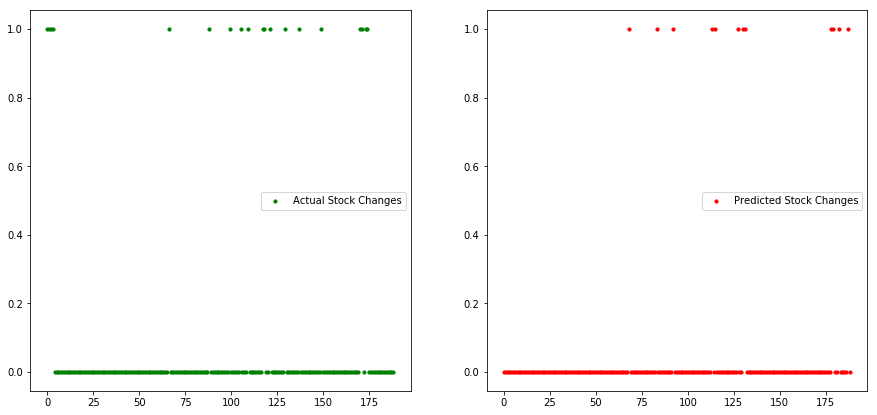

In [151]:
# Instantiate the FeatEngr clas 
feat = FeatEngr()

def getElementsWithIndex(index, source):
    result = []
    for i, ind in enumerate(index):
        val = source[ind]
        result.append(val)
    return result
        
# Split for training and testing

skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(sea_x, sea_y):
    X_train = getElementsWithIndex(train_index, sea_x)
    X_test = getElementsWithIndex(test_index, sea_x)
    y_train = getElementsWithIndex(train_index, sea_y)
    y_test = getElementsWithIndex(test_index, sea_y)
"""
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(hp_x, hp_y):
    X_train = getElementsWithIndex(train_index, hp_x)
    X_test = getElementsWithIndex(test_index, hp_x)
    y_train = getElementsWithIndex(train_index, hp_y)
    y_test = getElementsWithIndex(test_index, hp_y)
"""

ind0 = [i for i,y in enumerate(y_test) if y==0]
ind1 = [i for i,y in enumerate(y_test) if y==1]
sum0 = len(ind0)
sum1 = len(ind1)

# Train your Logistic Regression classifier 
feat.train_model(X_train, y_train, random_state=1230)

# Make predictions
pred = feat.model_predict(X_test)
y_test = array(y_test)

sums = sum(pred == y_test)
trainacc = sums/len(y_test)
print("Testing acuracy is",100*trainacc)

sum1 = 0
for i in range(0, len(pred)):
    bool = (pred[i] == 1) and (y_test[i] == 1)
    if bool:
        sum1 += 1
den1 = sum(y_test == 1)
print("Model predicts",100*sum1/den1,"percent of stock increases")

sum0 = 0
for i in range(0, len(pred)):
    bool = (pred[i] == 0) and (y_test[i] == 0)
    if bool:
        sum0 += 1
den0 = sum(y_test == 0)
print("Model predicts",100*sum0/den0,"percent of stock decreases")
''
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].scatter(range(0,len(y_test)),y_test,label="Actual Stock Changes",color="green",s=10)
ax[0].legend();
ax[1].scatter(range(0,len(pred)),pred,label="Predicted Stock Changes",color="red",s=10)
ax[1].legend();

fig.savefig("../results/compareSG")

In [ ]:

#train_test_split(hp_x, hp_y, test_size=0.4, random_state=6)



